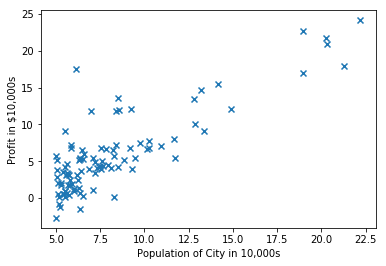

Testing the cost function with theta = [0 ; 0]
Expected cost value (approx): 32.07
Actual cost value: 32.0727338775

Testing the cost function with theta = [-1 ; 2]
Expected cost value (approx): 54.24
Actual cost value: 54.242455082

Running Gradient Descent
Expected theta value (approx): [-3.6303, 1.1664]
Actual theta value: [ 0.  0.]



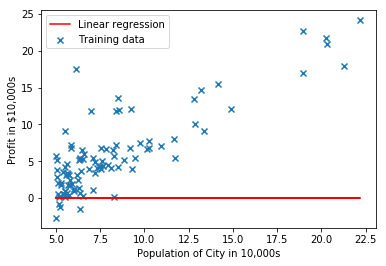

For population of 35,000 we predict a profit of 0.0
For population of 70,000 we predict a profit of 0.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# some functions
def computeCost(X, y, theta):
    m = y.size; # number of training examples
    h = X.dot(theta); # hypothesis
    cost = sum(pow(h-y, 2)) / (2*m); # cost function
    return cost;

def gradientDescent(X, y, theta, alpha, iterations):    
    m = y.size; # number of training examples
    computed_theta = theta;

    for i in range(0, iterations):
        h = X.dot(computed_theta); # hypothesis
        
        # updates theta0 and theta1
        computed_theta[0] = computed_theta[0] - alpha * (1/m) * sum(h - y);
        computed_theta[1] = computed_theta[1] - alpha * (1/m) * sum((h - y) * X[:,1])
        
    return computed_theta;

# step 1 - read data
data = pd.read_csv('./ex1data1.txt', header=None)
X = data.iloc[:, 0].values
y = data.iloc[:, 1].values
m = y.size

# step 2 - plot
plt.scatter(X, y, marker='x')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

# step 3 - cost function
# add column of ones to X
X = np.concatenate((np.ones((m,1), dtype=np.int), X.reshape(m,1)), axis=1)

# compute initial cost
print('Testing the cost function with theta = [0 ; 0]')

J = computeCost(X, y, np.array([0, 0]))
print('Expected cost value (approx): 32.07')
print('Actual cost value: {}\n'.format(J))

print('Testing the cost function with theta = [-1 ; 2]')
J = computeCost(X, y, np.array([-1, 2]))
print('Expected cost value (approx): 54.24')
print('Actual cost value: {}\n'.format(J))

# run gradient descent
theta = np.zeros(2)
alpha = 0.01
iterations = 1500

print('Running Gradient Descent')
theta = gradientDescent(X, y, theta, alpha, iterations)
print('Expected theta value (approx): [-3.6303, 1.1664]')
print('Actual theta value: {}\n'.format(theta))

# plot the linear fit
plt.scatter(X[:,1], y, marker='x', label='Training data')
plt.plot(X[:,1], X.dot(theta), color='r', label='Linear regression')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend()
plt.show()

# predict values for population sizes of 35,000 and 70,000
predict1 = np.array([1, 3.5]).dot(theta)
print('For population of 35,000 we predict a profit of {}'.format(predict1 * 10000))
      
predict2 = np.array([1, 7]).dot(theta)
print('For population of 70,000 we predict a profit of {}'.format(predict2 * 10000))